In [1]:
!pip install envs
!pip install python-dotenv
!pip install psycopg2-binary
from utils.Metadata import Metadata
from utils.Database import Database

import pandas as pd
import matplotlib.pyplot as plt
import math 
plt.style.use('ggplot')

In [2]:
meta = Metadata()
db = Database()

dfOpt = meta.dfOptimos()

In [3]:
dfEjec = meta.dfEjecuciones(db.getEjecuciones())
dfEjec = dfEjec.merge(dfOpt,how='left',on='instance').set_index(['id_ejec'])
dfRes = meta.dfResultados(db.getEjecucionesResultados())

In [4]:
tabla = dfEjec.reset_index().merge(dfRes,how='left',on='id_ejec')

In [6]:
jerarquia = ['GWO_SCP_BCL1_CPU_C','GWO_SCP_QL1_CPU_C','ANTHHGWO_SCP_FERO_CPU_C','ANTHHGWO_SCP_QL1_CPU_C']
tabla["algorithm"] = pd.Categorical(tabla["algorithm"],jerarquia)

In [7]:
dfEjec.reset_index().groupby(['algorithm','instance','status'])['id_ejec'].count().\
                                                        to_frame().\
                                                        reset_index().\
pivot(index=['algorithm','instance'],columns='status',values='id_ejec')

status                            ejecutando  pendiente  terminado
algorithm               instance                                  
ANTHHGWO_SCP_FERO_CPU_C mscp41           8.0       23.0        NaN
                        mscp51           8.0       23.0        NaN
                        mscp61           1.0       24.0        6.0
                        mscpa1           7.0       24.0        NaN
                        mscpb1           5.0       24.0        2.0
                        mscpc1           7.0       24.0        NaN
                        mscpd1           6.0       24.0        1.0
ANTHHGWO_SCP_QL1_CPU_C  mscp41           7.0       23.0        1.0
                        mscp51           5.0       24.0        2.0
                        mscp61           1.0       24.0        6.0
                        mscpa1           7.0       24.0        NaN
                        mscpb1           1.0       24.0        6.0
                        mscpc1           7.0       24.0        NaN
                        mscpd1           3.0       24.0        4.0
GWO_SCP_BCL1_CPU_C      mscp41           8.0       23.0        NaN
                        mscp51           8.0       23.0        NaN
                        mscp61           4.0       24.0        3.0
                        mscpa1           7.0       24.0        NaN
                        mscpb1           7.0       24.0        NaN
                        mscpc1           7.0       24.0        NaN
                        mscpd1           7.0       24.0        NaN
GWO_SCP_QL1_CPU_C       mscp41           7.0       23.0        1.0
                        mscp51           5.0       23.0        3.0
                        mscp61           NaN       24.0        7.0
                        mscpa1           7.0       24.0        NaN
                        mscpb1           1.0       24.0        6.0
                        mscpc1           7.0       24.0        NaN
                        mscpd1           1.0       24.0        6.0

In [8]:
tabla.query("status in ('terminado')").reset_index().groupby(['algorithm','instance']).agg({'optimo':['min'],'fitness':['max','min','mean','median'],'id_ejec':['count']})

optimo fitness                            \
                                    min     max    min        mean median   
algorithm               instance                                            
GWO_SCP_BCL1_CPU_C      mscp41      NaN     NaN    NaN         NaN    NaN   
                        mscp51      NaN     NaN    NaN         NaN    NaN   
                        mscp61    138.0   145.0  143.0  144.000000  144.0   
                        mscpb1      NaN     NaN    NaN         NaN    NaN   
                        mscpd1      NaN     NaN    NaN         NaN    NaN   
GWO_SCP_QL1_CPU_C       mscp41    429.0   430.0  430.0  430.000000  430.0   
                        mscp51    253.0   267.0  259.0  262.333333  261.0   
                        mscp61    138.0   146.0  140.0  143.142857  144.0   
                        mscpb1     69.0    71.0   69.0   70.166667   70.5   
                        mscpd1     60.0    65.0   61.0   62.500000   62.5   
ANTHHGWO_SCP_FERO_CPU_C mscp41      NaN     NaN    NaN         NaN    NaN   
                        mscp51      NaN     NaN    NaN         NaN    NaN   
                        mscp61    138.0   143.0  143.0  143.000000  143.0   
                        mscpb1     69.0    70.0   70.0   70.000000   70.0   
                        mscpd1     60.0    61.0   61.0   61.000000   61.0   
ANTHHGWO_SCP_QL1_CPU_C  mscp41    429.0     NaN    NaN         NaN    NaN   
                        mscp51    253.0   261.0  257.0  259.000000  259.0   
                        mscp61    138.0   142.0  140.0  141.000000  141.0   
                        mscpb1     69.0    69.0   69.0   69.000000   69.0   
                        mscpd1     60.0    62.0   60.0   61.000000   61.0   

                                 id_ejec  
                                   count  
algorithm               instance          
GWO_SCP_BCL1_CPU_C      mscp41         0  
                        mscp51         0  
                        mscp61         3  
                        mscpb1         0  
                        mscpd1         0  
GWO_SCP_QL1_CPU_C       mscp41         1  
                        mscp51         3  
                        mscp61         7  
                        mscpb1         6  
                        mscpd1         6  
ANTHHGWO_SCP_FERO_CPU_C mscp41         0  
                        mscp51         0  
                        mscp61         6  
                        mscpb1         2  
                        mscpd1         1  
ANTHHGWO_SCP_QL1_CPU_C  mscp41         1  
                        mscp51         2  
                        mscp61         6  
                        mscpb1         6  
                        mscpd1         4

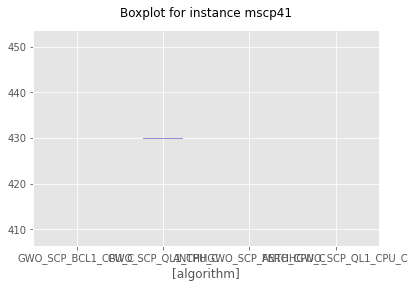

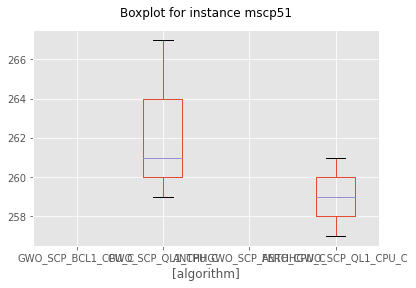

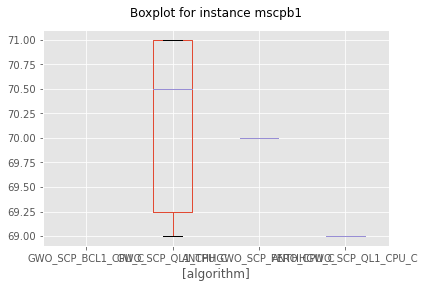

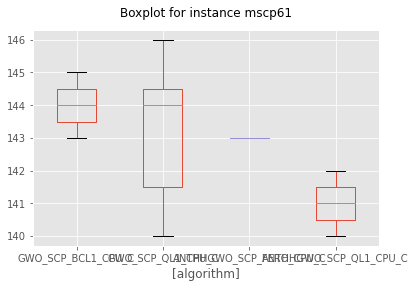

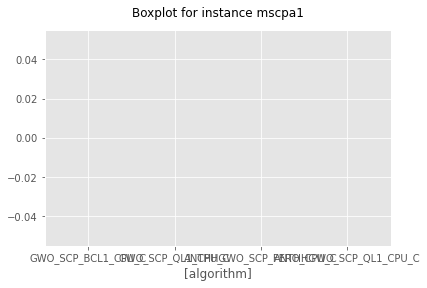

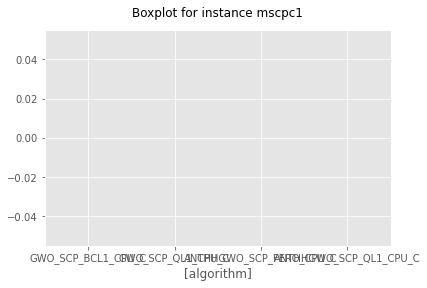

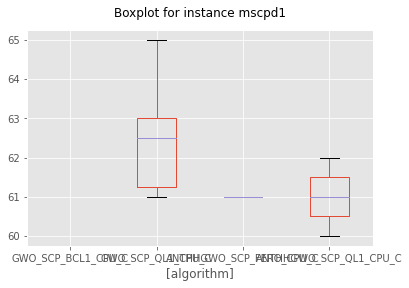

In [9]:
for instance in tabla.instance.unique():
    data = tabla.query("instance == @instance")[['algorithm','fitness']]
    data.boxplot(by=['algorithm'],column='fitness')
    plt.suptitle(f'Boxplot for instance {instance}')
    plt.title('')
    plt.show()